# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Agus Saputra Kambea
- **Email:** agussaputrakambea@gmail.com
- **ID Dicoding:** Agus Saputra Kambea

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi permintaan berdasarkan hari dalam seminggu atau waktu dalam sehari? 
- Faktor apa yang paling memengaruhi permintaan sewa sepeda (musim dan cuaca)?
- Bagaiamana Perbandingan persentase permintaan antara holiday dan workingday?
- Bagaimana perbedaan pola permintaan antara pengguna biasa dan pengguna kasual?
- Bagaimana Perbandingan tren penggunaan sepeda tiap tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

load tabel **day**

In [2]:
day_df = pd.read_csv('dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


load tabel **hour**

In [3]:
hour_df = pd.read_csv('dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### assessing ```day_df```

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print('jumlah duplikasi: ', day_df.duplicated().sum())

jumlah duplikasi:  0


berdasarkan hasil assessing diatas tidak terdapat missing value maupun duplikasi data, namun terdapat tipe data yang tidak sesuai pada kolom dteday

#### Assessing ```hour_df```

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print('jumlah duplikasi: ', hour_df.duplicated().sum())

jumlah duplikasi:  0


sama seperti tabel ```day_df```, pada tabel ```hour_df``` tidak terdapat missing value maupun duplikasi data, namun terdapat tipe data yang tidak sesuai pada kolom dteday

### Cleaning Data

In [10]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


mengubah nama kolom agar lebih mudah dibaca

In [11]:
rename_column = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr':'hour', 'cnt':'count', }
hour_df.rename(columns= rename_column, inplace=True)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


selanjutnya menghapus kolom yang tidak diperlukan, seperti instant, year, dan month

In [12]:
# hapus kolom yr, mnth
hour_df.drop(hour_df[['instant', 'year','month', 'temp', 'atemp', 'hum', 'windspeed']], axis=1, inplace=True)
hour_df.head()

,date,season,hour,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,4,0,6,0,1,0,1,1


selanjutnya mengubah tipe data pada kolom datetime menjadi datetime

In [13]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.head(3)

,date,season,hour,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,2,0,6,0,1,5,27,32


membuat kolom baru berdasarkan time range

In [14]:
# Tambahkan kolom 'time_range' setelah kolom 'date'
hour_df.insert(hour_df.columns.get_loc('date') + 1, 'time_range', pd.cut(hour_df['hour'],
                                           bins=[-1, 6, 12, 18, 24],
                                           labels=['Night', 'Morning', 'Afternoon', 'Evening']))

hour_df.head()

,date,time_range,season,hour,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,Night,1,0,0,6,0,1,3,13,16
1,2011-01-01,Night,1,1,0,6,0,1,8,32,40
2,2011-01-01,Night,1,2,0,6,0,1,5,27,32
3,2011-01-01,Night,1,3,0,6,0,1,3,10,13
4,2011-01-01,Night,1,4,0,6,0,1,0,1,1


In [15]:
# memastikan kolom time_range sudah terisi semua
print('jumlah missing value pada kolom time_range: ', hour_df['time_range'].isna().sum())

jumlah missing value pada kolom time_range:  0


In [16]:
hour_df.drop('hour', axis=1, inplace=True)

hour_df.head()

,date,time_range,season,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,Night,1,0,6,0,1,3,13,16
1,2011-01-01,Night,1,0,6,0,1,8,32,40
2,2011-01-01,Night,1,0,6,0,1,5,27,32
3,2011-01-01,Night,1,0,6,0,1,3,10,13
4,2011-01-01,Night,1,0,6,0,1,0,1,1


mengubah angka pada kolom season, month, weekday, dan wheatersit menjadi keterangan

In [17]:
hour_df['season'] = hour_df['season'].replace({1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'})
hour_df['weekday'] = hour_df['weekday'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
hour_df['weathersit'] = hour_df['weathersit'].replace({
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Light Snow',
    4: 'Heavy Rain/Snow+Fog'})
hour_df['holiday'] = hour_df['holiday'].replace({1:'holiday', 0:'workingday/weekend'})
hour_df['workingday'] = hour_df['workingday'].replace({1:'workingday', 0:'weekend/holiday'})

hour_df.sample(10)

,date,time_range,season,holiday,weekday,workingday,weathersit,casual,registered,count
2985,2011-05-09,Morning,Summer,workingday/weekend,Monday,workingday,Clear/Few Clouds,16,221,237
16624,2012-11-30,Morning,Winter,workingday/weekend,Friday,workingday,Mist/Cloudy,31,170,201
1026,2011-02-15,Morning,Springer,workingday/weekend,Tuesday,workingday,Clear/Few Clouds,11,46,57
10525,2012-03-19,Afternoon,Springer,workingday/weekend,Monday,workingday,Clear/Few Clouds,65,320,385
11630,2012-05-04,Evening,Summer,workingday/weekend,Friday,workingday,Clear/Few Clouds,64,388,452
10702,2012-03-27,Night,Summer,workingday/weekend,Tuesday,workingday,Clear/Few Clouds,1,4,5
15958,2012-11-02,Afternoon,Winter,workingday/weekend,Friday,workingday,Mist/Cloudy,51,255,306
2669,2011-04-26,Night,Summer,workingday/weekend,Tuesday,workingday,Clear/Few Clouds,17,4,21
9175,2012-01-23,Night,Springer,workingday/weekend,Monday,workingday,Mist/Cloudy,0,19,19
16135,2012-11-10,Night,Winter,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,8,68,76


selanjutnya cleaning tabel ```day_df```. Jika diperhatikan, tabel ```hour``` dan tabel ```day``` pada dasarnya adalah sama hanya saja pada tabel hour terdapat kolom ```hour``` yang mengindikasikan bahwa tabel hour memiliki data yang lebih kompleks yakni mencatat data dalam tiap jam.

dalam kasus ini, saya hanya akan menggunakan tabel ```hour```. untuk itu tabel ```day``` kita hapus.

In [18]:
del day_df

## Exploratory Data Analysis (EDA)

### Explore ```hour_df```

In [19]:
hour_df.sample(10)

,date,time_range,season,holiday,weekday,workingday,weathersit,casual,registered,count
14973,2012-09-21,Night,Fall,workingday/weekend,Friday,workingday,Clear/Few Clouds,6,8,14
8889,2012-01-11,Night,Springer,workingday/weekend,Wednesday,workingday,Clear/Few Clouds,2,72,74
3591,2011-06-03,Afternoon,Summer,workingday/weekend,Friday,workingday,Clear/Few Clouds,58,190,248
313,2011-01-14,Afternoon,Springer,workingday/weekend,Friday,workingday,Clear/Few Clouds,4,73,77
15438,2012-10-10,Morning,Winter,workingday/weekend,Wednesday,workingday,Clear/Few Clouds,53,238,291
10188,2012-03-05,Afternoon,Springer,workingday/weekend,Monday,workingday,Mist/Cloudy,13,115,128
1028,2011-02-15,Afternoon,Springer,workingday/weekend,Tuesday,workingday,Clear/Few Clouds,14,68,82
12834,2012-06-23,Evening,Fall,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,69,156,225
6308,2011-09-25,Morning,Winter,workingday/weekend,Sunday,weekend/holiday,Mist/Cloudy,85,190,275
2378,2011-04-14,Night,Summer,workingday/weekend,Thursday,workingday,Clear/Few Clouds,3,18,21


In [20]:
hour_df.describe(include='all')

,date,time_range,season,holiday,weekday,workingday,weathersit,casual,registered,count
count,17379,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,4,4,2,7,2,4,NaN,NaN,NaN
top,NaN,Night,Fall,workingday/weekend,Saturday,workingday,Clear/Few Clouds,NaN,NaN,NaN
freq,NaN,5001,4496,16879,2512,11865,11413,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000


#### 1. Mengelompokkan rata-rata pengguna (casual dan registered) berdasarkan hari

In [21]:
# Ubah kolom datetime menjadi indeks
hour_df.set_index('date', inplace=True)

In [22]:
hour_df.resample('D').agg({
    'weekday': 'first',
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
}).groupby('weekday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'}).sort_values(by='count', ascending=False).reset_index()

,weekday,casual,registered,count
0,Friday,752.288462,3938.000000,4690.288462
1,Thursday,590.961538,4076.298077,4667.259615
2,Saturday,1465.257143,3085.285714,4550.542857
3,Wednesday,551.144231,3997.394231,4548.538462
4,Tuesday,556.182692,3954.480769,4510.663462
5,Monday,674.133333,3663.990476,4338.123810
6,Sunday,1338.295238,2890.533333,4228.828571


Berdasarkan data diatas, rata-rata jumlah pengguna bike-sharing tertinggi pada hari jumat yaitu 4690 dan terendah pada hari Minggu yaitu 4228

#### 2. Mengelompokkan rata-rata jumlah pengguna (casual dan registered) berdasarkan bulan

In [23]:
hour_df.resample('M').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
}).groupby('date').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'}).sort_values(by='count', ascending=False).reset_index()

,date,casual,registered,count
0,2012-09-30,43778.0,174795.0,218573.0
1,2012-08-31,43197.0,171306.0,214503.0
2,2012-07-31,41705.0,161902.0,203607.0
3,2012-06-30,43294.0,159536.0,202830.0
4,2012-10-31,34538.0,164303.0,198841.0
5,2012-05-31,44235.0,151630.0,195865.0
6,2012-04-30,38456.0,135768.0,174224.0
7,2012-03-31,31618.0,133257.0,164875.0
8,2012-11-30,21009.0,131655.0,152664.0
9,2011-06-30,30612.0,112900.0,143512.0


berdasarkan data diatas, rata-rata pengguna sepeda terbanyak terjadi pada september 2012. penggunaan sepeda terendah pada bulan januari baik tahun 2012 maupun 2011

#### 3. Mengelompokkan rata-rata jumlah pengguna (casual dan registered) berdasarkan tahun

In [24]:
hour_df.resample('Y').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
}).groupby('date').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'}).reset_index()

,date,casual,registered,count
0,2011-12-31,247252,995851,1243103
1,2012-12-31,372765,1676811,2049576


berdasarkan data diatas penggunaan sepeda terbanyak pada tahun 2012 yang mencapai 2049576 dibanding tahun 2011 yang mencapai 1243103 jumlah pengguna

#### 4. mengelompokkan rata-rata jumlah pengguna berdasarkan time range

In [25]:
hour_df.groupby('time_range').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'
}).sort_values(by='count', ascending=False).reset_index()

,time_range,casual,registered,count
0,Afternoon,71.990400,252.146743,324.137143
1,Morning,39.662847,197.926198,237.589044
2,Evening,30.142308,155.664560,185.806868
3,Night,4.457508,27.864227,32.321736


berdasarkan data diatas penggunaan terbanyak terjadi pada siang hari dengan rata-rata pengguna 324, penggunaan paling sedikit pada malam hari dengan rata-rata pengguna 32 

#### 5. mengelompokkan rata-rata jumlah pengguna berdasarkan season

In [26]:
hour_df.groupby('season').agg({
    'casual': 'mean',
    'registered' : 'mean',
    'count': 'mean'
}).sort_values(by='count', ascending=False).reset_index()

,season,casual,registered,count
0,Fall,50.287144,185.729093,236.016237
1,Summer,46.160581,162.183488,208.344069
2,Winter,30.666824,168.202032,198.868856
3,Springer,14.290901,96.823668,111.114569


berdasarkan data diatas penggunaan sepeda terbanyak pada musim gugur, dan paling sedikit pada musim semi

#### 6 mengelompokkan rata-rata jumlah pengguna berdasarkan holiday

In [27]:
hour_df.groupby('holiday').agg({
    'casual': 'mean',
    'registered' : 'mean',
    'count': 'mean'
}).sort_values(by='count', ascending=False).reset_index()

,holiday,casual,registered,count
0,workingday/weekend,35.408377,155.020203,190.42858
1,holiday,44.718000,112.152000,156.87000


berdasarkan data diatas, penggunaan sepeda terbanyak pada hari kerja termasuk weekend dibanding hari libur

#### 7. mengelompokkan jumlah pengguna berdasarkan workingday

In [28]:
hour_df.groupby('workingday').agg({
    'casual': 'mean',
    'registered' : 'mean',
    'count': 'mean'
}).sort_values(by='count', ascending=False).reset_index()

,workingday,casual,registered,count
0,workingday,25.561315,167.646439,193.207754
1,weekend/holiday,57.441422,123.963910,181.405332


berdasarkan data diatas, penggunaan sepeda terbanyak pada hari kerja dibanding weekend dan hari libur

#### 8. mengelompokkan jumlah pengguna berdasarkan weather

In [29]:
hour_df.groupby('weathersit').agg({
    'casual': 'mean',
    'registered' : 'mean',
    'count': 'mean'
}).sort_values(by='count', ascending=False).reset_index()

,weathersit,casual,registered,count
0,Clear/Few Clouds,40.545431,164.323841,204.869272
1,Mist/Cloudy,29.595290,145.570202,175.165493
2,Light Rain/Light Snow,16.055673,95.523608,111.579281
3,Heavy Rain/Snow+Fog,2.666667,71.666667,74.333333


berdasarkan data diatas, penggunaan sepeda terbanyak pada saat cuaca cerah. penggunaan terendah pada saat hujan lebat/bersalju

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana variasi permintaan berdasarkan hari dalam seminggu atau waktu dalam sehari? 

In [30]:
# Daftar urutan hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_df = hour_df.resample('D').agg({
    'weekday': 'first',
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
}).groupby('weekday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'})

# Lakukan pengurutan berdasarkan urutan hari
weekday_df = weekday_df.reindex(days_order, level=1)

# Reindeks DataFrame agar urutan hari menjadi sesuai
weekday_df = weekday_df.reset_index()

weekday_df

,weekday,casual,registered,count
0,Monday,674.133333,3663.990476,4338.123810
1,Tuesday,556.182692,3954.480769,4510.663462
2,Wednesday,551.144231,3997.394231,4548.538462
3,Thursday,590.961538,4076.298077,4667.259615
4,Friday,752.288462,3938.000000,4690.288462
5,Saturday,1465.257143,3085.285714,4550.542857
6,Sunday,1338.295238,2890.533333,4228.828571


In [31]:
time_range_df = hour_df.groupby('time_range').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'
}).reset_index()
time_range_df

,time_range,casual,registered,count
0,Night,4.457508,27.864227,32.321736
1,Morning,39.662847,197.926198,237.589044
2,Afternoon,71.990400,252.146743,324.137143
3,Evening,30.142308,155.664560,185.806868


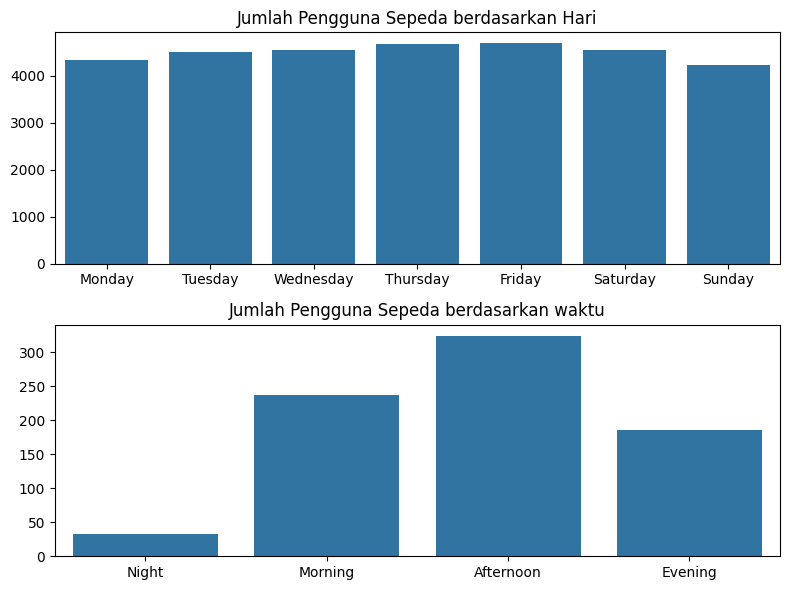

In [32]:
# Membuat subplot
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Bar plot berdasarkan Hari
sns.barplot(
    x='weekday',
    y='count',
    data= weekday_df,
    ax=ax[0]
)
ax[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Bar plot berdasarkan time range
sns.barplot(
    x='time_range',
    y='count',
    data= time_range_df,
    ax=ax[1]
)
ax[1].set_title('Jumlah Pengguna Sepeda berdasarkan waktu')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.tight_layout()
plt.show()

berdasarkan visualisasi diatas, dapat dijelaskan sebagai berikut:
- penggunaan sepeda tertinggi pada hari jumat dan disusul kamis. penggunaan terendah terjadi pada hari minggu dan senin.
- penggunaan sepeda tertinggi terjadi pada siang hari, kemudian pagi hari, malam hari, dan terendah terjadi pada tengah malam sampai subuh.


### Pertanyaan 2: Faktor apa yang paling memengaruhi permintaan sewa sepeda (berdasarkan musim dan cuaca)?

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23400\3946097967.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23400\3946097967.py:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23400\3946097967.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23400\3946097967.py:28: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23400\3946097967.py:35: UserWarning: FixedFormatter sho

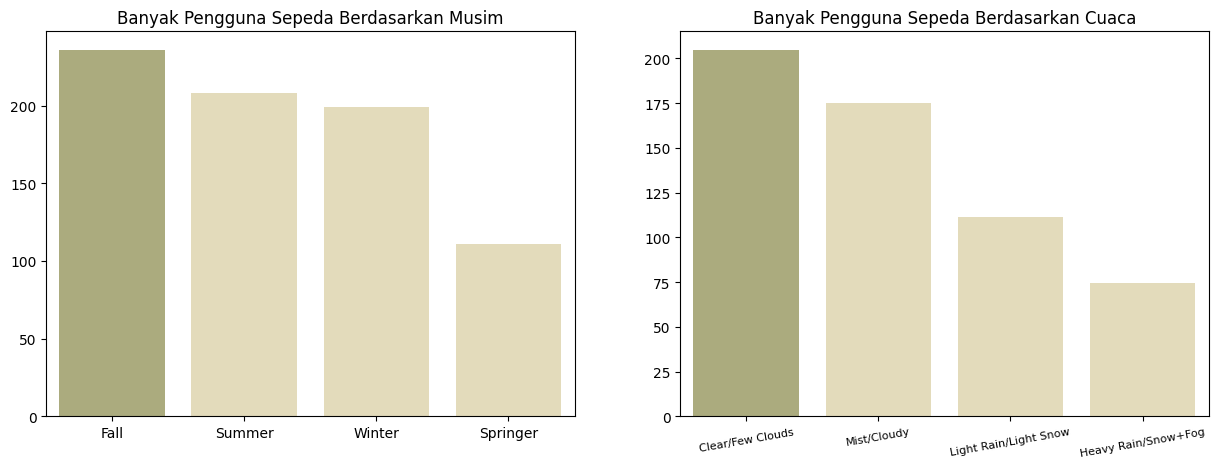

In [33]:
colors = ["#B2B377", "#EADFB4", "#EADFB4", "#EADFB4", "#EADFB4"]
# Membuat subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

season_df = hour_df.groupby('season').agg({
    'casual': 'mean',
    'registered' : 'mean',
    'count': 'mean'
}).reset_index()

sns.barplot(
    x="season", 
    y="count",
    data=season_df.sort_values(by="count", ascending=False),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("Banyak Pengguna Sepeda Berdasarkan Musim", loc="center", fontsize=12)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)

weather_df = hour_df.groupby('weathersit').agg({
    'casual': 'mean',
    'registered' : 'mean',
    'count': 'mean'
}).reset_index()

sns.barplot(
    y="count",
    x="weathersit", 
    data=weather_df.sort_values(by="count", ascending=False),
    palette=colors,
    ax=ax[1]
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10, fontsize=8)
ax[1].set_title("Banyak Pengguna Sepeda Berdasarkan Cuaca", loc="center", fontsize=12)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
plt.show()


dari visualisasi diatas, dapat dijelaskan sebagai berikut:
- penggunaan sepeda tertinggi terjadi pada musim gugur dan terendah pada musim semi
- penggunaan sepeda tertinggi saat cuaca cerah dan terendah pada hujan lebat/bersalju

### Pertanyaan 3: Bagaiamana Perbandingan persentase permintaan antara holiday dan workingday?

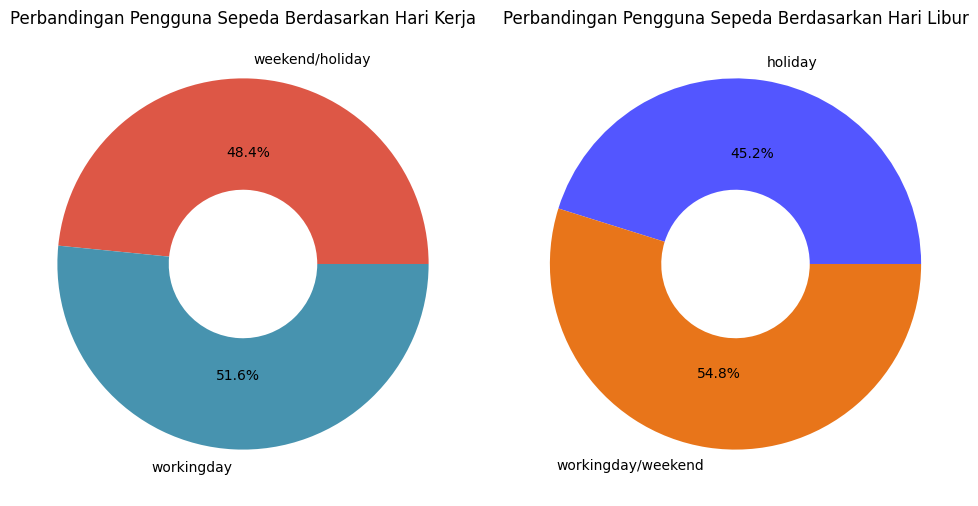

In [34]:
# Membuat subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

workingday_df = hour_df.groupby('workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'
}).reset_index()

# Diagram lingkaran untuk hari kerja
ax[0].pie(workingday_df['count'], labels=workingday_df['workingday'], autopct='%1.1f%%', colors=['#DD5746', '#4793AF'], wedgeprops={'width': 0.6})
ax[0].set_title("Perbandingan Pengguna Sepeda Berdasarkan Hari Kerja", loc="center", fontsize=12)

holiday_df = hour_df.groupby('holiday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'
}).reset_index()

# Diagram lingkaran untuk hari libur
ax[1].pie(holiday_df['count'], labels=holiday_df['holiday'], autopct='%1.1f%%', colors=['#5356FF', '#E8751A'], wedgeprops={'width': 0.6})
ax[1].set_title("Perbandingan Pengguna Sepeda Berdasarkan Hari Libur", loc="center", fontsize=12)

plt.tight_layout()
plt.show()

berdasarkan visualisasi diatas dapat disimpulkan bahwa persentase tertinggi penggunaan sepeda terjadi pada hari kerja dibanding bukan hari kerja maupun hari libur nasional

### Pertanyaan 4: Bagaimana perbedaan pola permintaan antara pengguna biasa dan pengguna kasual?

In [35]:
weekday_users_df = weekday_df[['weekday', 'casual', 'registered']]
weekday_users_df

,weekday,casual,registered
0,Monday,674.133333,3663.990476
1,Tuesday,556.182692,3954.480769
2,Wednesday,551.144231,3997.394231
3,Thursday,590.961538,4076.298077
4,Friday,752.288462,3938.000000
5,Saturday,1465.257143,3085.285714
6,Sunday,1338.295238,2890.533333


In [36]:
season_users_df = season_df[['season', 'casual', 'registered']]
season_users_df

,season,casual,registered
0,Fall,50.287144,185.729093
1,Springer,14.290901,96.823668
2,Summer,46.160581,162.183488
3,Winter,30.666824,168.202032


In [37]:
weather_users_df = weather_df[['weathersit', 'casual', 'registered']]
weather_users_df

,weathersit,casual,registered
0,Clear/Few Clouds,40.545431,164.323841
1,Heavy Rain/Snow+Fog,2.666667,71.666667
2,Light Rain/Light Snow,16.055673,95.523608
3,Mist/Cloudy,29.595290,145.570202


In [38]:
time_range_users_df = time_range_df[['time_range', 'casual', 'registered']]
time_range_users_df

,time_range,casual,registered
0,Night,4.457508,27.864227
1,Morning,39.662847,197.926198
2,Afternoon,71.990400,252.146743
3,Evening,30.142308,155.664560


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23400\3037406132.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(weather_users_df['weathersit'], rotation=10)


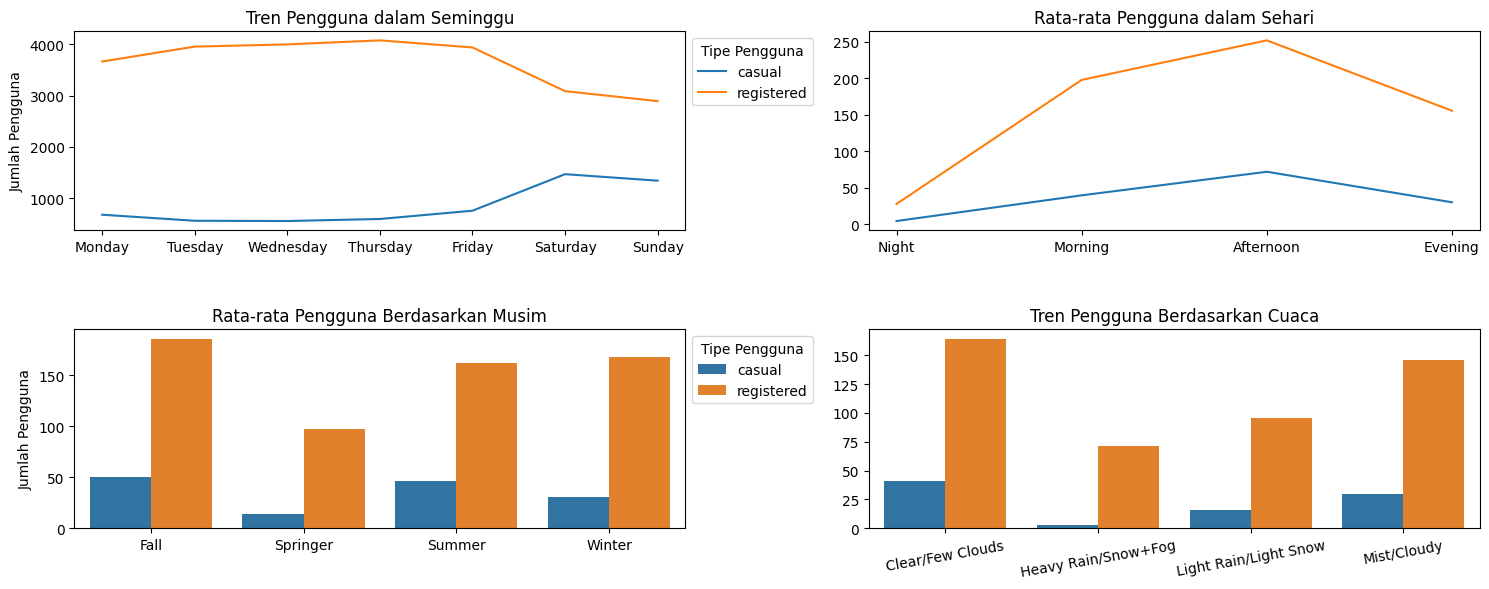

In [49]:
# Buat diagram garis untuk memvisualisasikan tren
# Membuat subplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Berdasarkan hari
sns.lineplot(x='weekday', y='value', hue='variable', data=pd.melt(weekday_users_df, ['weekday']), ax=ax[0,0])
ax[0,0].set_title('Tren Pengguna dalam Seminggu', fontsize=12)
ax[0,0].set_xlabel(None)
ax[0,0].set_ylabel('Jumlah Pengguna', fontsize=10)
ax[0,0].set_xticks(range(7))
ax[0,0].legend(title='Tipe Pengguna', loc='upper left', bbox_to_anchor=(1, 1))

# Berdasarkan time range
sns.lineplot(x='time_range', y='value', hue='variable', data=pd.melt(time_range_users_df, ['time_range']), ax=ax[0,1])
ax[0,1].set_title('Rata-rata Pengguna dalam Sehari', fontsize=12)
ax[0,1].set_xlabel(None)
ax[0,1].set_ylabel(None)
ax[0,1].legend().remove()
plt.tight_layout()

# Berdasarkan musim
sns.barplot(x='season', y='value', hue='variable', data=pd.melt(season_users_df, ['season']), ax=ax[1,0])
ax[1,0].set_title('Rata-rata Pengguna Berdasarkan Musim', fontsize=12)
ax[1,0].set_xlabel(None)
ax[1,0].set_ylabel('Jumlah Pengguna', fontsize=10)
ax[1,0].legend(title='Tipe Pengguna', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Berdasarkan cuaca
sns.barplot(x='weathersit', y='value', hue='variable', data=pd.melt(weather_users_df, ['weathersit']), ax=ax[1,1])
ax[1,1].set_title('Rata-rata Pengguna Berdasarkan Cuaca', fontsize=12)
ax[1,1].set_xlabel(None)
ax[1,1].set_ylabel(None)
ax[1,1].set_xticklabels(weather_users_df['weathersit'], rotation=10)
ax[1,1].legend().remove()
plt.tight_layout()

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

berdasarkan grafik diatas, didapat pernyataan berikut:
- pengguna registered lebih tinggi dibanding pengguna casual
- berdasarkan data hari, pengguna casual dan registered memiliki tren yang berbanding terbalik, pengguna casual meningkat pada hari sabtu sedangkan pengguna registered menurun pada hari tersebut
- selain berdasarkan hari, tren pengguna casual dan registered cenderung mirip

In [40]:
workingday_users_df = workingday_df[['workingday', 'casual', 'registered']]
workingday_users_df

,workingday,casual,registered
0,weekend/holiday,57.441422,123.963910
1,workingday,25.561315,167.646439


In [41]:
holiday_users_df = holiday_df[['holiday', 'casual', 'registered']]
holiday_users_df

,holiday,casual,registered
0,holiday,44.718000,112.152000
1,workingday/weekend,35.408377,155.020203


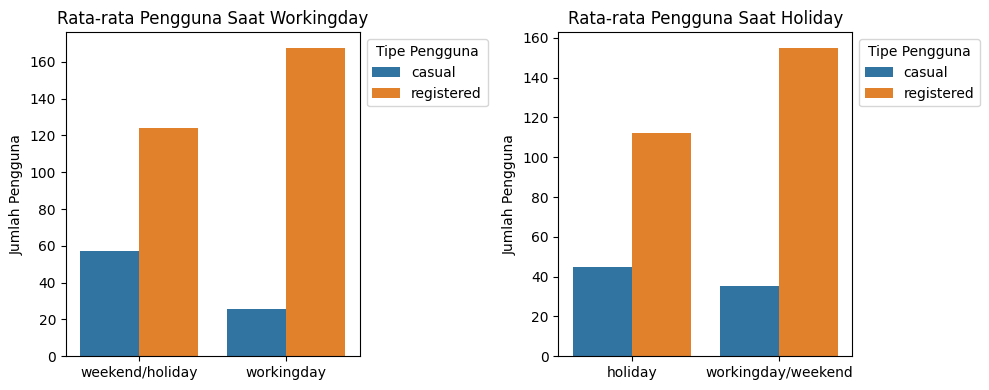

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Berdasarkan cuaca
sns.barplot(x='workingday', y='value', hue='variable', data=pd.melt(workingday_users_df, ['workingday']), ax=ax[0])
ax[0].set_title('Rata-rata Pengguna Saat Workingday', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_ylabel('Jumlah Pengguna', fontsize=10)
ax[0].legend(title='Tipe Pengguna', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Berdasarkan cuaca
sns.barplot(x='holiday', y='value', hue='variable', data=pd.melt(holiday_users_df, ['holiday']), ax=ax[1])
ax[1].set_title('Rata-rata Pengguna Saat Holiday', fontsize=12)
ax[1].set_xlabel(None)
ax[1].set_ylabel('Jumlah Pengguna', fontsize=10)
ax[1].legend(title='Tipe Pengguna', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

berdasarkan grafik diatas, pengguna registered lebih tinggi pada saat workingday atau hari kerja dan rendah pada hari weekend maupun hari libur nasional. berbanding terbalik dengan pengguna registered, pengguna casual lebih tinggi pada saat hari libur atau weekend dibanding hari kerja

### Pertanyaan 5: Bagaimana Perbandingan tren penggunaan sepeda tiap tahun?

In [43]:
month_df = hour_df.resample('M').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
}).groupby('date').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'}).reset_index()

month_df

,date,casual,registered,count
0,2011-01-31,3073.0,35116.0,38189.0
1,2011-02-28,6242.0,41973.0,48215.0
2,2011-03-31,12826.0,51219.0,64045.0
3,2011-04-30,22346.0,72524.0,94870.0
4,2011-05-31,31050.0,104771.0,135821.0
5,2011-06-30,30612.0,112900.0,143512.0
6,2011-07-31,36452.0,104889.0,141341.0
7,2011-08-31,28842.0,107849.0,136691.0
8,2011-09-30,26545.0,100873.0,127418.0
9,2011-10-31,25222.0,98289.0,123511.0


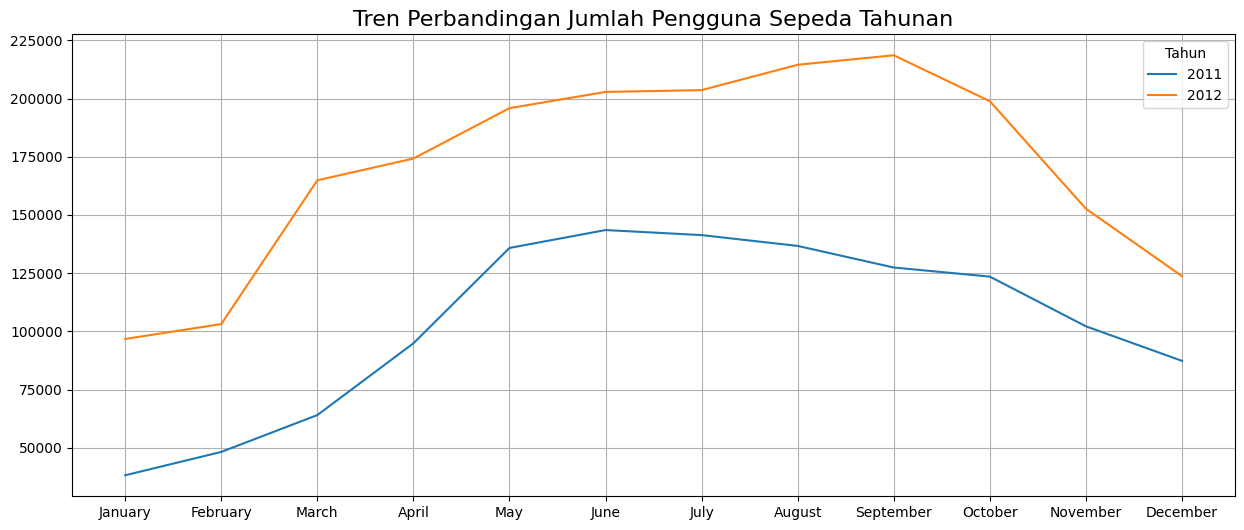

In [44]:
# Membuat plot
plt.figure(figsize=(15, 6))

# Menggunakan seaborn untuk membuat plot garis dengan tren
sns.lineplot(data=month_df, x=month_df['date'].dt.strftime('%B'), y='count', hue=month_df['date'].dt.strftime('%Y'), estimator='mean')

# Memberi judul dan label sumbu
plt.title('Tren Perbandingan Jumlah Pengguna Sepeda Tahunan', fontsize=16)
plt.xlabel(None)
plt.ylabel(None)

# Menampilkan legenda
plt.legend(title='Tahun')

# Menyertakan grid
plt.grid(True)

# Menampilkan plot
plt.show()

berdasarkan grafik diatas, disimpulkan beberapa hal berikut:
- jumlah pengguna sepeda lebih tinggi pada tahun 2012
- pada tahun 2011 penggunaan terendah terjadi pada bulan januari (dibawah 50.000) dan meningkat drastis pada bulan maret, kemudian terus meningkat hingga bulan juni (diatas 140.000), kemudian mulai merusut hingga bulan desember (dibawah 100.000)
- pada tahun 2012 penggunaan terendah terjadi pada bulan januari (diatas 90.000) dan terus meningkat sampai bulan september (diatas 220.000), kemudian merusut hingga desember (125.000)

## Conclusion

- Conclution pertanyaan 1: 
   * Pengguna sepeda jika dilihat berdasarkan hari, rata-rata banyaknya pengguna berurut mulai dari Minggu dan terus meningkat sampai hari Jumat, kemudian menurun kembali hingga hari Minggu. Walaupun terlihat pola banyaknya pengguna tiap harinya, rata-rata pengguna sepeda mencapai diangka 4000+ tiap harinya.
   * Dalam sehari Pengguna sepeda terendah terjadi pada tengah malam kemudian semakin meningkat hingga siang hari, kemudian penggunaan menurun kembali hingga malam hari.
    
- Conclution pertanyaan 2:
   * Penggunaan Sepeda Berdasarkan Musim:
      - Penggunaan sepeda tertinggi terjadi pada musim gugur.
      - Penggunaan sepeda terendah terjadi pada musim semi.
   * Penggunaan Sepeda Berdasarkan Cuaca:
      - Penggunaan sepeda tertinggi terjadi saat cuaca cerah atau sedikit berawan.
      - Penggunaan sepeda terendah terjadi pada saat hujan lebat atau bersalju.

- Conclution pertanyaan 3: persentase tertinggi penggunaan sepeda terjadi pada hari kerja dibanding bukan hari kerja maupun hari libur nasional

- Conclution pertanyaan 4: 
   * Jumlah pengguna registered secara keseluruhan lebih tinggi dibandingkan dengan jumlah pengguna casual.
   * Berdasarkan data hari, terlihat tren yang berbanding terbalik antara pengguna casual dan registered. Pengguna casual cenderung meningkat   pada hari Sabtu, sedangkan pengguna registered cenderung menurun pada hari tersebut.
   * Selain berdasarkan hari, tren pengguna casual dan registered cenderung mirip atau sejalan.
   * Pengguna registered cenderung lebih tinggi pada saat hari kerja atau working day, dan lebih rendah pada hari libur atau weekend.
   Sebaliknya, pengguna casual cenderung lebih tinggi pada saat hari libur atau weekend, dibandingkan dengan hari kerja.

- Conclution pertanyaan 5:
   * Terdapat peningkatan jumlah pengguna sepeda secara keseluruhan pada tahun 2012, dibandingkan dengan tahun 2011.
   * Pada tahun 2011, terjadi variasi jumlah penggunaan sepeda dari bulan ke bulan. Penggunaan terendah terjadi pada bulan Januari, dengan jumlah di bawah 50.000. Kemudian terjadi peningkatan drastis pada bulan Maret, dan terus meningkat hingga mencapai puncaknya pada bulan Juni, dengan jumlah di atas 140.000. Namun, setelah bulan Juni, jumlah penggunaan sepeda mulai merosot hingga akhir tahun.
   * Pada tahun 2012, pola penggunaan sepeda sedikit berbeda. Jumlah penggunaan terendah juga terjadi pada bulan Januari, tetapi dengan jumlah yang lebih tinggi, di atas 90.000. Selanjutnya, jumlah penggunaan terus meningkat secara signifikan hingga mencapai puncaknya pada bulan September, dengan jumlah di atas 220.000. Namun, seperti tahun sebelumnya, setelah bulan tersebut, jumlah penggunaan kembali menurun hingga akhir tahun, tetapi masih di atas 125.000.   

In [45]:
# hour_df.to_csv("main_data.csv", index=False)

In [46]:
hour_df.head()

,time_range,season,holiday,weekday,workingday,weathersit,casual,registered,count
date,,,,,,,,,
2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,3,13,16
2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,8,32,40
2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,5,27,32
2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,3,10,13
2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,0,1,1


In [47]:
hour_df = hour_df.reset_index()
hour_df.head()

,date,time_range,season,holiday,weekday,workingday,weathersit,casual,registered,count
0,2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,3,13,16
1,2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,8,32,40
2,2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,5,27,32
3,2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,3,10,13
4,2011-01-01,Night,Springer,workingday/weekend,Saturday,weekend/holiday,Clear/Few Clouds,0,1,1


In [48]:
hour_df.to_csv("main_data.csv", index=False)